In [9]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import DataStructs
import numpy as np

def calculate_tanimoto_coefficient(mol1, mol2):
    fp1 = Chem.RDKFingerprint(mol1)
    fp2 = Chem.RDKFingerprint(mol2)
    return DataStructs.TanimotoSimilarity(fp1, fp2)

def generate_tanimoto_matrix(smiles_list):
    num_compounds = len(smiles_list)
    tanimoto_matrix = np.zeros((num_compounds, num_compounds))

    for i in range(num_compounds):
        for j in range(i, num_compounds):
            smiles_i = smiles_list[i]
            smiles_j = smiles_list[j]

            mol_i = Chem.MolFromSmiles(smiles_i)
            mol_j = Chem.MolFromSmiles(smiles_j)

            if mol_i is not None and mol_j is not None:
                tanimoto_coefficient = calculate_tanimoto_coefficient(mol_i, mol_j)
                tanimoto_matrix[i, j] = tanimoto_coefficient
                tanimoto_matrix[j, i] = tanimoto_coefficient

    return tanimoto_matrix

if __name__ == "__main__":
    csv_file = '/Users/hannah/Desktop/smiles.csv'  # Replace with the path to your CSV file
    df = pd.read_csv(csv_file)  # There is a header but it skips that
    smiles_list = df.iloc[:, 1].tolist()  # Extract SMILES strings from column 2

    tanimoto_matrix = generate_tanimoto_matrix(smiles_list)

    print("Tanimoto Matrix:")
    print(tanimoto_matrix)


Tanimoto Matrix:
[[1.         0.73508353 0.40282132 ... 0.19063005 0.22222222 0.31181319]
 [0.73508353 1.         0.33433735 ... 0.17990276 0.21449851 0.26301736]
 [0.40282132 0.33433735 1.         ... 0.17894737 0.25089928 0.28045977]
 ...
 [0.19063005 0.17990276 0.17894737 ... 1.         0.42708333 0.6286201 ]
 [0.22222222 0.21449851 0.25089928 ... 0.42708333 1.         0.50988554]
 [0.31181319 0.26301736 0.28045977 ... 0.6286201  0.50988554 1.        ]]


In [10]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import DataStructs
import numpy as np

def calculate_tanimoto_coefficient(mol1, mol2):
    fp1 = Chem.RDKFingerprint(mol1)
    fp2 = Chem.RDKFingerprint(mol2)
    return DataStructs.TanimotoSimilarity(fp1, fp2)

def generate_tanimoto_matrix(smiles_list):
    num_compounds = len(smiles_list)
    tanimoto_matrix = np.zeros((num_compounds, num_compounds))

    for i in range(num_compounds):
        for j in range(i, num_compounds):
            smiles_i = smiles_list[i]
            smiles_j = smiles_list[j]

            mol_i = Chem.MolFromSmiles(smiles_i)
            mol_j = Chem.MolFromSmiles(smiles_j)

            if mol_i is not None and mol_j is not None:
                tanimoto_coefficient = calculate_tanimoto_coefficient(mol_i, mol_j)
                tanimoto_matrix[i, j] = tanimoto_coefficient
                tanimoto_matrix[j, i] = tanimoto_coefficient

    return tanimoto_matrix

if __name__ == "__main__":
    csv_file = '/Users/hannah/Desktop/smiles.csv'  # Replace with the path to your CSV file
    df = pd.read_csv(csv_file)
    smiles_list = df.iloc[:, 1].tolist()  # Extract SMILES strings from column 2

    tanimoto_matrix = generate_tanimoto_matrix(smiles_list)

    # Convert the matrix to a DataFrame for better formatting
    tanimoto_df = pd.DataFrame(tanimoto_matrix, columns=df.iloc[:, 1].tolist(), index=df.iloc[:, 1].tolist())

    # Save the DataFrame to a CSV file
    output_csv = '/Users/hannah/Desktop/tanimoto_matrix.csv'  # Specify the desired output file name
    tanimoto_df.to_csv(output_csv)
    
    print(f"Tanimoto Matrix saved to {output_csv}")


Tanimoto Matrix saved to /Users/hannah/Desktop/tanimoto_matrix.csv


In [11]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import DataStructs
import numpy as np

def calculate_tanimoto_coefficient(mol1, mol2):
    fp1 = Chem.RDKFingerprint(mol1)
    fp2 = Chem.RDKFingerprint(mol2)
    return DataStructs.TanimotoSimilarity(fp1, fp2)

def generate_tanimoto_matrix(smiles_list):
    num_compounds = len(smiles_list)
    tanimoto_matrix = np.zeros((num_compounds, num_compounds))

    for i in range(num_compounds):
        for j in range(i, num_compounds):
            smiles_i = smiles_list[i]
            smiles_j = smiles_list[j]

            mol_i = Chem.MolFromSmiles(smiles_i)
            mol_j = Chem.MolFromSmiles(smiles_j)

            if mol_i is not None and mol_j is not None:
                tanimoto_coefficient = calculate_tanimoto_coefficient(mol_i, mol_j)
                tanimoto_matrix[i, j] = tanimoto_coefficient
                tanimoto_matrix[j, i] = tanimoto_coefficient

    return tanimoto_matrix

if __name__ == "__main__":
    csv_file = '/Users/hannah/Desktop/smiles.csv'  
    df = pd.read_csv(csv_file)
    smiles_list = df.iloc[:, 1].tolist()  # Extract SMILES strings from column 2
    
    # Convert the matrix to a DataFrame with numerical indices
    num_compounds = len(smiles_list)
    numerical_indices = list(range(1, num_compounds + 1))
    tanimoto_matrix = generate_tanimoto_matrix(smiles_list)
    tanimoto_df = pd.DataFrame(tanimoto_matrix, columns=numerical_indices, index=numerical_indices)

    # Save the DataFrame to a CSV file
    output_csv = '/Users/hannah/Desktop/tanimoto_matrix.csv'  
    tanimoto_df.to_csv(output_csv)
    
    print(f"Tanimoto Matrix saved to {output_csv}")

Tanimoto Matrix saved to /Users/hannah/Desktop/tanimoto_matrix.csv


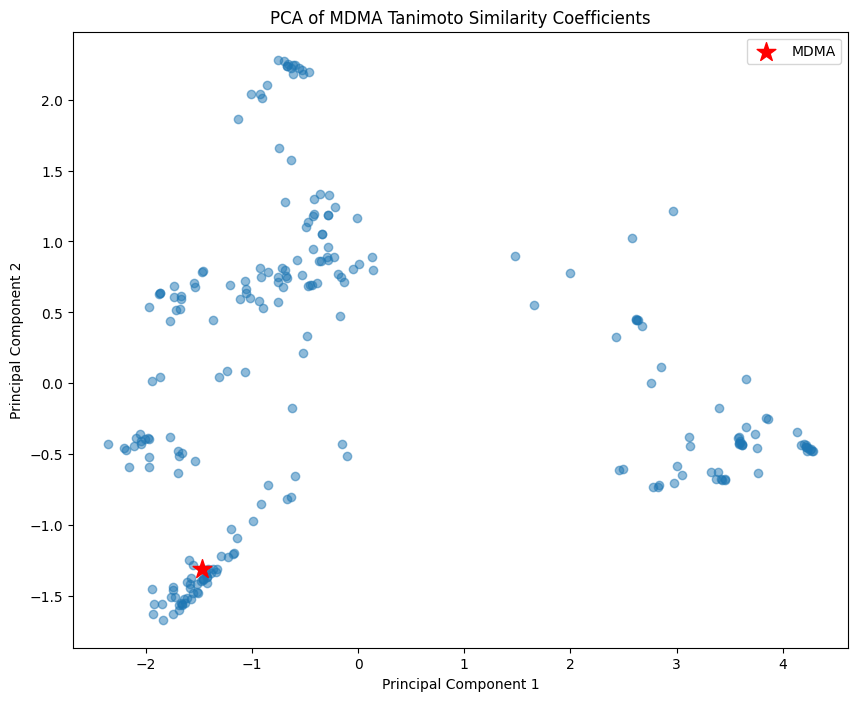

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Tanimoto matrix CSV file without skipping any rows
tanimoto_matrix = pd.read_csv("/Users/hannah/Desktop/tanimoto_matrix.csv", index_col=0)

# Extract row 109 (MDMA) and transpose the DataFrame
mdma_row = tanimoto_matrix.iloc[109].values.reshape(1, -1)

# Perform PCA on the transposed DataFrame
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tanimoto_matrix.transpose())

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=tanimoto_matrix.columns)

# Plot the PCA graph
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.scatter(pca_df.iloc[109]['PC1'], pca_df.iloc[109]['PC2'], color='red', marker='*', s=200, label='MDMA')
plt.title('PCA of MDMA Tanimoto Similarity Coefficients')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


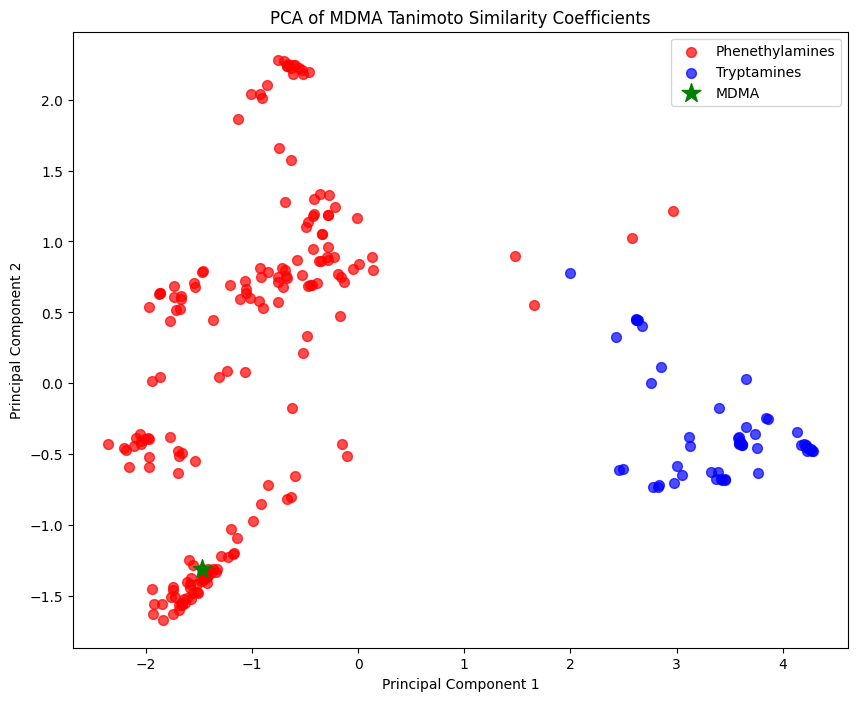

In [18]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Tanimoto matrix CSV file without skipping any rows
tanimoto_matrix = pd.read_csv("/Users/hannah/Desktop/tanimoto_matrix.csv", index_col=0)

# Define the ranges for phenethylamines (1-179) and tryptamines (180-234)
phenethylamines_range = list(range(1, 180))
tryptamines_range = list(range(180, 235))

# Perform PCA on the DataFrame
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tanimoto_matrix)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=tanimoto_matrix.index)

# Plot the PCA graph
plt.figure(figsize=(10, 8))

# Scatter plot for phenethylamines (in red)
plt.scatter(pca_df.loc[phenethylamines_range, 'PC1'], pca_df.loc[phenethylamines_range, 'PC2'],
            color='red', alpha=0.7, marker='o', s=50, label='Phenethylamines')

# Scatter plot for tryptamines (in blue)
plt.scatter(pca_df.loc[tryptamines_range, 'PC1'], pca_df.loc[tryptamines_range, 'PC2'],
            color='blue', alpha=0.7, marker='o', s=50, label='Tryptamines')

plt.scatter(pca_df.iloc[109]['PC1'], pca_df.iloc[109]['PC2'], color='green', marker='*', s=200, label='MDMA')

# Customize the plot
plt.title('PCA of MDMA Tanimoto Similarity Coefficients')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

